## Project 1 - Cleaning and preparing tables on Python Pandas

1- Description of project

Project using Python and DA libraries. The objective is using these libraries and functions in order to read and prepare some tables. All data on the tables are fake and generated.

2- Structure

- Folder table contains 3x Excel tables. They are already prepared for use (duplicity, null values and rows, mistyping, bad number formatting, equalizing columns of the three files). It was already worked inside Excel itself using formulas and formatting. The first row of the three contains the column names. But in any case it will not be taken for granted and everything will be verified using Pandas.

- Created a project on GitHub to manage the changes, loaded files (concordia, mcgill, trebas.xlsx), created jupyter files to document process. The Excel files without the first cleaning is in the folder also with the suffix ORIGINAL.

In [41]:
#First part
#Import libraries and sheets to be used. Basic formating and cleaning was already made with Excel but we will make sure everything is OK using Python functions.

import pandas as pd
import numpy as np
dfcon = pd.read_excel('data/Concordia.xlsx')
dfmcg = pd.read_excel('data/McGill.xlsx')
dftre = pd.read_excel('data/TREBAS.xlsx')

In [42]:
#Get sheets basic info
dfcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          888 non-null    int64  
 1   Full Name   888 non-null    object 
 2   First Name  888 non-null    object 
 3   Last Name   874 non-null    object 
 4   City        0 non-null      float64
 5   Country     888 non-null    object 
 6   Program     888 non-null    object 
 7   Flag        888 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


In [43]:
dfmcg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          888 non-null    float64
 1   Full Name   888 non-null    object 
 2   First Name  888 non-null    object 
 3   Last Name   876 non-null    object 
 4   City        888 non-null    object 
 5   Country     888 non-null    object 
 6   Program     888 non-null    object 
 7   Flag        888 non-null    object 
dtypes: float64(1), object(7)
memory usage: 55.6+ KB


In [44]:
dftre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          888 non-null    object
 1   Full Name   888 non-null    object
 2   First Name  888 non-null    object
 3   Last Name   876 non-null    object
 4   City        888 non-null    object
 5   Country     888 non-null    object
 6   Program     888 non-null    object
 7   Flag        888 non-null    object
dtypes: object(8)
memory usage: 55.6+ KB


In [55]:
#Joining the three tables in one.
dtotal = pd.concat([dfcon, dfmcg, dftre], ignore_index=True) #ignore index true - redo index numbers after concatenating

#Get all the info of the new table
dtotal.info()
dtotal.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2664 non-null   object
 1   Full Name   2664 non-null   object
 2   First Name  2664 non-null   object
 3   Last Name   2626 non-null   object
 4   City        1776 non-null   object
 5   Country     2664 non-null   object
 6   Program     2664 non-null   object
 7   Flag        2664 non-null   object
dtypes: object(8)
memory usage: 166.6+ KB


ID            object
Full Name     object
First Name    object
Last Name     object
City          object
Country       object
Program       object
Flag          object
dtype: object

In [56]:
dtotal.shape #lines and columns

(2664, 8)

In [57]:
dtotal.head()

,ID,Full Name,First Name,Last Name,City,Country,Program,Flag
0,1,A. S. Neill,A.,S. Neill,NaN,England,Analytics,Concordia
1,2,Abe Moffat,Abe,Moffat,NaN,Scotland,Analytics,Concordia
2,3,Adam Ant,Adam,Ant,NaN,England,Analytics,Concordia
3,4,Adam Dodd,Adam,Dodd,NaN,England,Analytics,Concordia
4,5,Adam Smith,Adam,Smith,NaN,Scotland,Analytics,Concordia


In [58]:
dtotal.tail()

,ID,Full Name,First Name,Last Name,City,Country,Program,Flag
2659,TI_00884,Winston Churchill,Winston,Churchill,Aberdeen,Scotland,Data Analytics,Trebas
2660,TI_00885,Wyn Jones,Wyn,Jones,Llandovery,Wales,Data Analytics,Trebas
2661,TI_00886,Zack Sabre,Zack,Sabre,the Isle of Sheppey,England,Data Analytics,Trebas
2662,TI_00887,Zayn Malik,Zayn,Malik,Bradford,England,Data Analytics,Trebas
2663,TI_00888,Zubair Hoque,Zubair,Hoque,Hale,England,Data Analytics,Trebas


In [65]:
#Now lets check for the null values in each column
print(dtotal.isnull().sum())

ID              0
Full Name       0
First Name      0
Last Name      38
City          888
Country         0
Program         0
Flag            0
dtype: int64


In [66]:
#Out of 2663 entries, 888 doesnt have city registered. We will drop the column as it doesnt have enough quantity to be considered.
dtotal.drop(['City'], inplace=True, axis=1)
dtotal.head()

,ID,Full Name,First Name,Last Name,Country,Program,Flag
0,1,A. S. Neill,A.,S. Neill,England,Analytics,Concordia
1,2,Abe Moffat,Abe,Moffat,Scotland,Analytics,Concordia
2,3,Adam Ant,Adam,Ant,England,Analytics,Concordia
3,4,Adam Dodd,Adam,Dodd,England,Analytics,Concordia
4,5,Adam Smith,Adam,Smith,Scotland,Analytics,Concordia


In [70]:
#Check Last Name nulls
dtotal[dtotal['Last Name'].isna()]

,ID,Full Name,First Name,Last Name,Country,Program,Flag
874,27,Alfred,Alfred,NaN,Wales,Analytics,Concordia
875,87,Bram,Bram,NaN,England,Analytics,Concordia
876,192,Diana,Diana,NaN,England,Analytics,Concordia
877,203,Duffy,Duffy,NaN,Wales,Analytics,Concordia
878,561,Mary,Mary,NaN,Scotland,Analytics,Concordia
879,622,Paige,Paige,NaN,England,Analytics,Concordia
880,659,Prajadhipok,Prajadhipok,NaN,England,Analytics,Concordia
881,100,Camilla,Camilla,NaN,England,Cyber Security,Concordia
882,109,Catherine,Catherine,NaN,England,Cyber Security,Concordia
883,488,Kasabian,Kasabian,NaN,England,Cyber Security,Concordia


In [82]:
#38 names are missing the last names. Lets verify if some name is repeated in a program and university.
dtotal[dtotal['Last Name'].isna()].duplicated(subset=['Full Name', 'Program', 'Flag']).sum()

0

In [89]:
#Because no name is repeated in the same institution we'll still use them considering as just missing last name data.
#Now, check for duplicity in the whole table
#dtotal.duplicated(subset=['ID', 'Full Name', 'Country', 'Program', 'Flag']).sum()
dtotal[dtotal.duplicated(subset=['ID', 'Full Name', 'Country', 'Program', 'Flag'])]
#No duplicates

,ID,Full Name,First Name,Last Name,Country,Program,Flag


In [ ]:
#String cleaning
#Trimming already done with excel
#Code for string trimming (remove extra spaces)
#dtotal[<column>] = dtotal[<column>].str.strip()

In [93]:
#Check for wrong values (numbers on string columns, mistyped values, exagerated values, etc)
#Checking for wrong values on Country, Course, Flag
print(dtotal['Country'].unique())
print(dtotal['Program'].unique())
print(dtotal['Flag'].unique())

['England' 'Scotland' 'Wales' 'Northern Ireland']
['Analytics' 'Cyber Security' 'Data Analytics']
['Concordia' 'McGill' 'Trebas']


In [59]:
#save final treated dataframe to an excel file
dtotal.to_excel('data/TOTAL.xlsx')
pd.read_excel('data/TOTAL.xlsx').head()

,Unnamed: 0,ID,Full Name,First Name,Last Name,City,Country,Program,Flag
0,0,1,A. S. Neill,A.,S. Neill,NaN,England,Analytics,Concordia
1,1,2,Abe Moffat,Abe,Moffat,NaN,Scotland,Analytics,Concordia
2,2,3,Adam Ant,Adam,Ant,NaN,England,Analytics,Concordia
3,3,4,Adam Dodd,Adam,Dodd,NaN,England,Analytics,Concordia
4,4,5,Adam Smith,Adam,Smith,NaN,Scotland,Analytics,Concordia


After the cleaning and preparation of tables and saving the final dataframe, lets visualize some of the data by plotting graphs.

([<matplotlib.patches.Wedge at 0x20f6a3fdc60>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Concordia'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'McGill'),
  Text(0.5500001486524352, -0.9526278583383436, 'Trebas')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%\n(888)'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%\n(888)'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%\n(888)')])

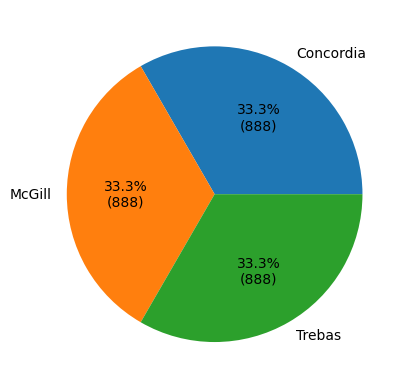

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/a/71515035/2901002
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

s = dtotal['Flag'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
#pandas only alternative
#s.plot.pie(autopct=autopct_format(s))

#Quantity of samples of each school - pie chart
#fig = plt.figure(figsize =(10, 7))
#y = dtotal['Flag'].value_counts()
#labelsFlag =  dtotal['Flag'].unique()
#plt.pie(y, labels = labelsFlag)
#plt.show()

In [ ]:
#Bar chart, each college, qty of students on each course
x_axis = ['value_1', 'value_2', 'value_3', ...]
y_axis = ['value_1', 'value_2', 'value_3', ...]
plt.bar(x_axis, y_axis)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()




#Scatter plot
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')
df.plot(kind = 'scatter', x = 'Duration', y = 'Maxpulse')

#histogram
df["Duration"].plot(kind = 'hist')